In [ ]:
from distill_circuit import *
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# reproduce example from https://arxiv.org/pdf/1211.5554.pdf figure 3
hg_ex = [[0, 3], [2, 6],  [4], [1, 2, 3, 4], [0, 1, 2, 3, 4, 5, 6]]
hg_ex_circuit = hypergraph_to_circuit(hg_ex, 7)
print(hg_ex_circuit)

     ┌───┐              
q_0: ┤ H ├──■─────────■─
     ├───┤  │         │ 
q_1: ┤ H ├──┼──────■──■─
     ├───┤  │      │  │ 
q_2: ┤ H ├──┼───■──■──■─
     ├───┤  │   │  │  │ 
q_3: ┤ H ├──■───┼──■──■─
     ├───┤┌───┐ │  │  │ 
q_4: ┤ H ├┤ Z ├─┼──■──■─
     ├───┤└───┘ │     │ 
q_5: ┤ H ├──────┼─────■─
     ├───┤      │     │ 
q_6: ┤ H ├──────■─────■─
     └───┘              


See what basic types of hypergraph states have bk-distillable magic

In [ ]:

hg_5 = [list(range(5))]
wf = hypergraph_to_state(hg_5, 5)
repeat_distill(wf, 10, full=True, verbose=True, direction=0)

Maximum T fidelity:  0.3445595429104854
Maximum T fidelity:  0.7864402967878146
Maximum T fidelity:  0.20041210632522966
Maximum T fidelity:  0.7282143954100501
Maximum T fidelity:  0.09436569652809289
Maximum T fidelity:  0.099221739221791
Maximum T fidelity:  0.11424283943988958
Maximum T fidelity:  0.17090252203833278
Maximum T fidelity:  0.5232463241752783
Maximum T fidelity:  0.4611446764292749


[0.3445595429104854,
 0.7864402967878146,
 0.20041210632522966,
 0.7282143954100501,
 0.09436569652809289,
 0.099221739221791,
 0.11424283943988958,
 0.17090252203833278,
 0.5232463241752783,
 0.4611446764292749]

In [ ]:
q0 = qi.partial_trace(wf, range(4))
qs = repeat_distill(wf, 15, full=True, verbose=True, return_qubit=True)

Maximum T fidelity:  0.6554404570895144
Maximum T fidelity:  0.7864402967878146
Maximum T fidelity:  0.7995878936747702
Maximum T fidelity:  0.7282143954100501
Maximum T fidelity:  0.9056343034719073
Maximum T fidelity:  0.9007782607782089
Maximum T fidelity:  0.8857571605601101
Maximum T fidelity:  0.8290974779616673
Maximum T fidelity:  0.5232463241752783
Maximum T fidelity:  0.5388553235707249
Maximum T fidelity:  0.5652774246678351
Maximum T fidelity:  0.6112257427436897
Maximum T fidelity:  0.6968114498513919
Maximum T fidelity:  0.8672309166398999
Maximum T fidelity:  0.7361816905549571


In [ ]:
dm_elements  = np.array([q.data.real for q in qs])

In [ ]:
rho_00 = dm_elements[:, 0, 0]
rho_01 = dm_elements[:, 0, 1]
rho_10 = dm_elements[:, 1, 0]
rho_11 = dm_elements[:, 1, 1]

In [ ]:
rho_01 - rho_10

array([ 0.00000000e+00, -1.86482774e-17,  5.55111512e-17,  2.63677968e-16,
        1.11022302e-15,  1.83186799e-15,  3.46944695e-15,  8.11850587e-15,
        3.58602037e-14,  6.06181771e-14,  1.04305453e-13,  1.90236715e-13,
        4.08395540e-13,  1.39588341e-12,  4.27119451e-12])

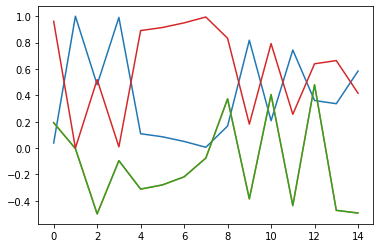

In [ ]:
plt.plot(rho_00)
plt.plot(rho_01)
plt.plot(rho_11)


In [ ]:
qi.DensityMatrix(t0), qi.DensityMatrix(t1)

(DensityMatrix([[0.78867513+0.j        , 0.28867513-0.28867513j],
                [0.28867513+0.28867513j, 0.21132487+0.j        ]],
               dims=(2,)),
 DensityMatrix([[ 0.21132487+0.j        , -0.28867513+0.28867513j],
                [-0.28867513-0.28867513j,  0.78867513+0.j        ]],
               dims=(2,)))

In [ ]:
qi.state_fidelity(t0, t1)

7.703719777548943e-34

In [ ]:
new_out_qubit

DensityMatrix([[0.5   +0.00000000e+00j, 0.4375+6.86915451e-17j],
               [0.4375-6.86915451e-17j, 0.5   -1.54074396e-33j]],
              dims=(2,))

In [ ]:
qi.state_fidelity(q1, t0), qi.state_fidelity(q1, t1)

(0.3445595429104854, 0.6554404570895144)

In [ ]:
repeat_distill(wf, 10, full=True, verbose=True, direction=1)

Maximum T fidelity:  0.6554404570895144
Maximum T fidelity:  0.7864402967878146
Maximum T fidelity:  0.7995878936747702
Maximum T fidelity:  0.7282143954100501
Maximum T fidelity:  0.9056343034719073
Maximum T fidelity:  0.9007782607782089
Maximum T fidelity:  0.8857571605601101
Maximum T fidelity:  0.8290974779616673
Maximum T fidelity:  0.5232463241752783
Maximum T fidelity:  0.5388553235707249


0.5388553235707249

In [ ]:
repeat_distill(wf, 6, full=True, verbose=True)

Maximum T fidelity:  0.6554404570895144
Maximum T fidelity:  0.7864402967878146
Maximum T fidelity:  0.7995878936747702
Maximum T fidelity:  0.7282143954100501
Maximum T fidelity:  0.9056343034719073
Maximum T fidelity:  0.9007782607782089


0.9007782607782089

In [ ]:
repeat_distill(hypergraph_to_state([[0, 1, 2], [3, 4]], 5), 10, full=True, verbose=True)

Maximum T fidelity:  0.7886751345948126
Maximum T fidelity:  0.7886751345948138
Maximum T fidelity:  0.7886751345948089
Maximum T fidelity:  0.7886751345948335
Maximum T fidelity:  0.7886751345947068
Maximum T fidelity:  0.7886751345953225
Maximum T fidelity:  0.788675134592165
Maximum T fidelity:  0.7886751346075526
Maximum T fidelity:  0.7886751345286191
Maximum T fidelity:  0.7886751349133052


0.7886751349133052

In [ ]:
repeat_distill(hypergraph_to_state([[0, 1, 2], [1, 2, 3, 4], [3, 4]], 5), 10, full=True, verbose=True)

Maximum T fidelity:  0.5577350269189626
Maximum T fidelity:  0.5979134545740916
Maximum T fidelity:  0.6711480408968022
Maximum T fidelity:  0.8186245378059679
Maximum T fidelity:  0.600233266192901
Maximum T fidelity:  0.6755673374522865
Maximum T fidelity:  0.827488611822468
Maximum T fidelity:  0.5351712200033569
Maximum T fidelity:  0.5590036975491048
Maximum T fidelity:  0.600140489064567


0.600140489064567